In [2]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

In [5]:
'''Data Mining Project
'''

# Preprocessing and initial data exploration
df = pd.read_csv('./Inpatient_Data_2011_CSV/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
df.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.958434,9707.477867,8494.495174
std,151563.671767,27854.323080,51.104042,35065.365905,7664.642652,7309.467247
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,110092.000000,27261.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,250007.000000,44309.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,380075.000000,72901.000000,49.000000,43232.592590,11286.400000,10056.882350
max,670077.000000,99835.000000,3383.000000,929118.909100,156158.181800,154620.818200


In [7]:
pandas_profiling.ProfileReport(df)

KeyboardInterrupt: 

# Preprocessing

In [6]:
'''
Preprocessing
  - Encode the columns that have text instead of numbers
'''
print(df.columns)

encoder = preprocessing.OrdinalEncoder()

cols = ['DRG Definition','Provider Name','Provider Street Address', 'Provider City', 'Provider State','Hospital Referral Region (HRR) Description']
for col in cols:
    topic = np.array(df[col].unique()).reshape(-1,1)
    encoder.fit(topic)
    df[col] = encoder.transform(np.array(df[col]).reshape(-1,1))

df.head()

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0.0,10001,2518.0,318.0,454.0,1.0,36301,2.0,91,32963.07692,5777.241758,4763.736264
1,0.0,10005,1498.0,1493.0,177.0,1.0,35957,1.0,14,15131.85714,5787.571429,4976.714286
2,0.0,10006,729.0,1229.0,582.0,1.0,35631,1.0,24,37560.37500,5434.958333,4453.791667
3,0.0,10011,2722.0,2290.0,162.0,1.0,35235,1.0,25,13998.28000,5417.560000,4129.160000
4,0.0,10016,2444.0,86.0,13.0,1.0,35007,1.0,18,31633.27778,5658.333333,4851.444444


# Data Exploration

In [ ]:
'''
Data Exploration continued
  - More plotting and stuff
'''
# Warning: This will take a bit of time to run so be prepared before running (possible 20+ mins) see file it is saved to
sns.pairplot(df)
plt.savefig('Column_by_Column.png')

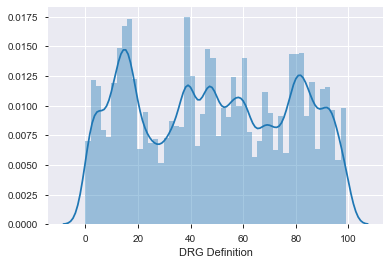

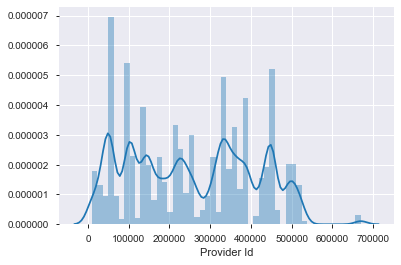

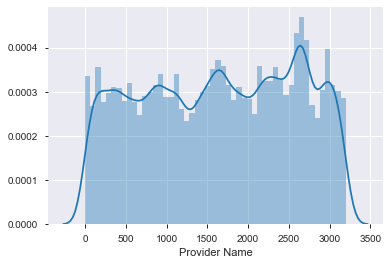

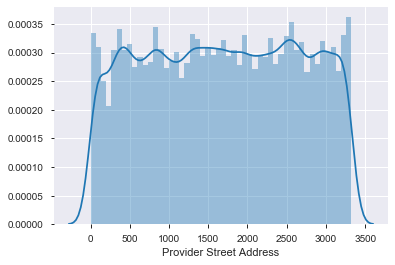

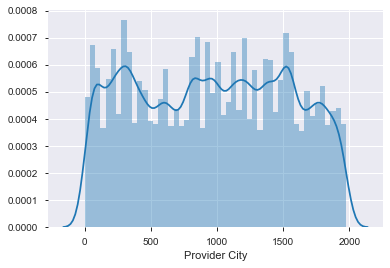

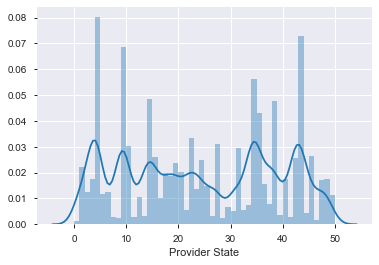

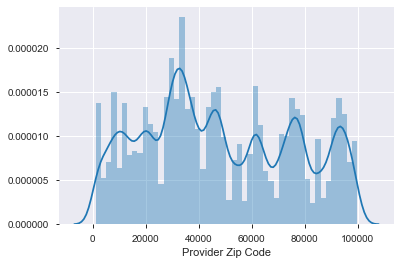

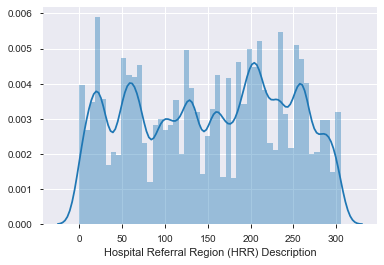

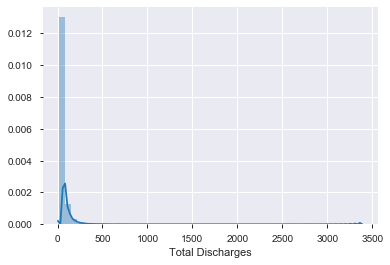

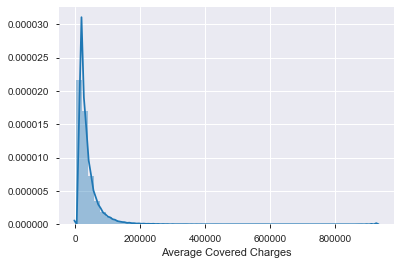

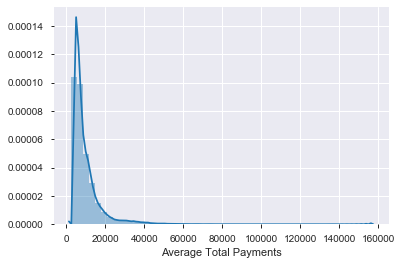

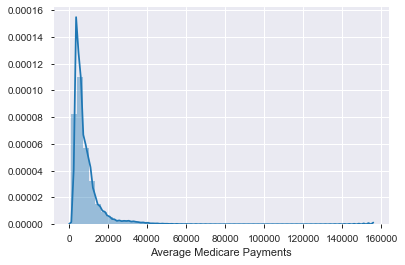

In [7]:
# Bar graphs that are more readable
i = 0
for col in df.columns:
    plt.figure(i)
    sns.distplot(df[col])
    i+=1

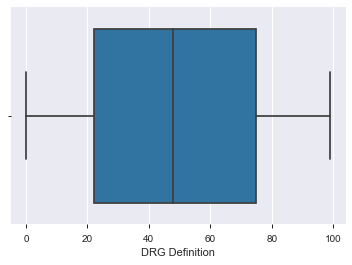

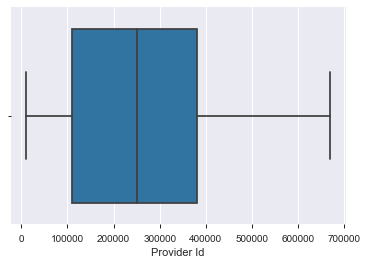

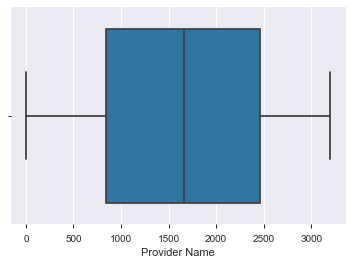

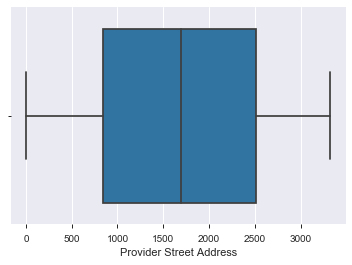

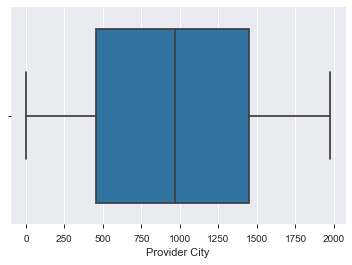

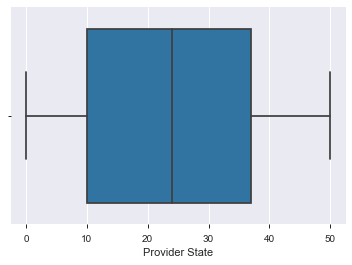

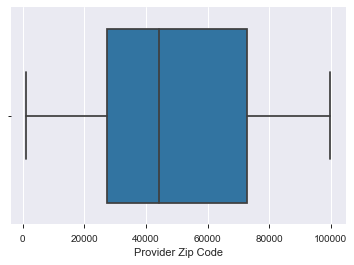

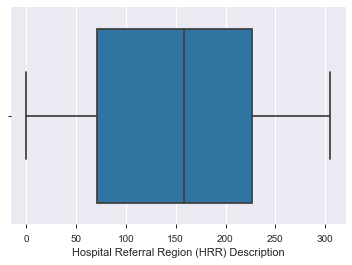

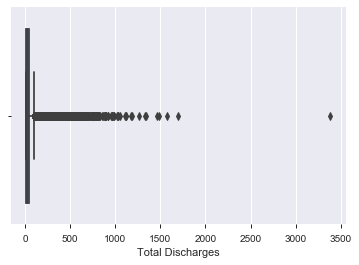

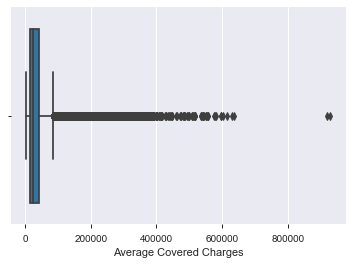

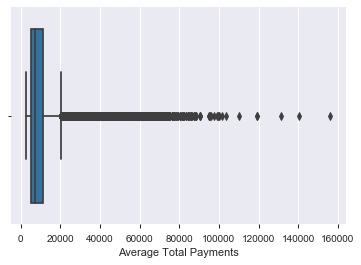

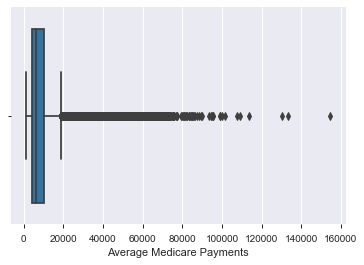

In [8]:
# Box plots of data
i = 0
for col in df.columns:
    plt.figure(i)
    sns.boxplot(df[col])
    i+=1

In [9]:
df.describe()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,48.805568,255569.865428,1637.504382,1680.229865,964.389188,24.179560,47938.121908,151.779254,42.776304,36133.958434,9707.477867,8494.495174
std,28.934214,151563.671767,926.613671,961.281152,564.127054,14.499223,27854.323080,87.552090,51.104042,35065.365905,7664.642652,7309.467247
min,0.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1040.000000,0.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,22.000000,110092.000000,838.000000,847.000000,454.000000,10.000000,27261.000000,71.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,48.000000,250007.000000,1665.000000,1689.000000,970.000000,24.000000,44309.000000,158.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,75.000000,380075.000000,2462.000000,2514.000000,1449.000000,37.000000,72901.000000,227.000000,49.000000,43232.592590,11286.400000,10056.882350
max,99.000000,670077.000000,3200.000000,3325.000000,1976.000000,50.000000,99835.000000,305.000000,3383.000000,929118.909100,156158.181800,154620.818200


Min: 5.970146577996632e-07, Max: 65.3614426838996
STD: 0.618197525812431
Mean: 0.7860227853436493


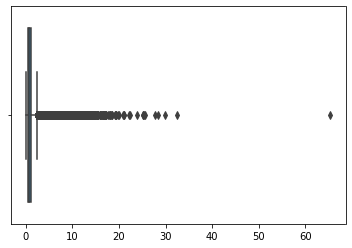

In [5]:
# No used, but we can talk about what we tried using z-scores
df_z = np.abs(stats.zscore(df))
df_z.sort()
max = np.max(df_z)
min = np.min(df_z)
print(f'Min: {min}, Max: {max}')
print(f'STD: {np.std(df_z)}')
print(f'Mean: {np.mean(df_z)}')

sns.boxplot(df_z)


df2 = df[(np.abs(stats.zscore(df)) <= 1).all(axis=1)]
df2.head()
sns.boxplot(stats.zscore(df2))

# Decision Tree 

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dz = df.copy()

In [6]:
from sklearn import tree
c = tree.DecisionTreeClassifier(random_state=1)

In [7]:
train, test = train_test_split(df, test_size = 0.30)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))

Training samples: 114145; Test samples: 48920


# Trees with only Numerical Category Predictors

In [9]:
#Using All Numerical Values to find provider state
features1 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges"]
target1 = ["Provider State"]

X_train1 = train[features1]
y_train1 = train[target1]

X_test1 = test[features1]
y_test1 = test[target1]

dt1 = c.fit(X_train1, y_train1)

In [10]:
y_pred1 = c.predict(X_test1)

In [11]:
from sklearn.metrics import accuracy_score

score1 = accuracy_score(y_test1, y_pred1) * 100
rounded_score1 = round(score1, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score1))

Decision Tree Classifier Accuracy: 8.3%


In [89]:
#Using All Numerical Values to Provider Zip Code
features2 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges"]
target2 = ["Provider Zip Code"]

X_train2 = train[features2]
y_train2 = train[target2]

X_test2 = test[features2]
y_test2 = test[target2]

dt2 = c.fit(X_train2, y_train2)

In [90]:
y_pred2 = c.predict(X_test2)

In [91]:
score2 = accuracy_score(y_test2, y_pred2) * 100
rounded_score2 = round(score2, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score2))

Decision Tree Classifier Accuracy: 0.4%


In [92]:
#Using All Numerical Values to Provider Id
features3 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges"]
target3 = ["Provider Id"]

X_train3 = train[features3]
y_train3 = train[target3]

X_test3 = test[features3]
y_test3 = test[target3]

dt3 = c.fit(X_train3, y_train3)

In [93]:
y_pred3 = c.predict(X_test3)

In [94]:
score3 = accuracy_score(y_test3, y_pred3) * 100
rounded_score3 = round(score3, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score3))

Decision Tree Classifier Accuracy: 0.4%


In [95]:
#Using All Numerical Values to Provider City
features4 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges"]
target4 = ["Provider City"]

X_train4 = train[features4]
y_train4 = train[target4]

X_test4 = test[features4]
y_test4 = test[target4]

dt4 = c.fit(X_train4, y_train4)

In [96]:
y_pred4 = c.predict(X_test4)

In [97]:
score4 = accuracy_score(y_test4, y_pred4) * 100
rounded_score4 = round(score4, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score4))

Decision Tree Classifier Accuracy: 0.8%


In [98]:
#Using All Numerical Values to Provider Name
features5 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges"]
target5 = ["Provider Name"]

X_train5 = train[features5]
y_train5 = train[target5]

X_test5 = test[features5]
y_test5 = test[target5]

dt5 = c.fit(X_train5, y_train5)

In [99]:
y_pred5 = c.predict(X_test5)

In [100]:
score5 = accuracy_score(y_test5, y_pred5) * 100
rounded_score5 = round(score5, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score5))

Decision Tree Classifier Accuracy: 0.4%


In [101]:
#Using All Numerical Values to DRG Definition
features6 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges"]
target6 = ["DRG Definition"]

X_train6 = train[features6]
y_train6 = train[target6]

X_test6 = test[features6]
y_test6 = test[target6]

dt6 = c.fit(X_train6, y_train6)

In [102]:
y_pred6 = c.predict(X_test6)

In [103]:
score6 = accuracy_score(y_test6, y_pred6) * 100
rounded_score6 = round(score6, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score6))

Decision Tree Classifier Accuracy: 6.5%


In [104]:
#Using All Numerical Values to HRR
features7 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges"]
target7 = ["Hospital Referral Region (HRR) Description"]

X_train7 = train[features7]
y_train7 = train[target7]

X_test7 = test[features7]
y_test7 = test[target7]

dt7 = c.fit(X_train7, y_train7)

In [105]:
y_pred7 = c.predict(X_test7)

In [106]:
score7 = accuracy_score(y_test7, y_pred7) * 100
rounded_score7 = round(score7, 1)
print("Decision Tree Classifier Accuracy: {}%".format(rounded_score7))

Decision Tree Classifier Accuracy: 2.2%


# Random Forests for only Numerical Predictors

The following random forests are done with the 2 decision trees that had the best accuracy before when we did everything else. The random forrests helped a little bit with accuracy but we still couldn't get a good number.

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1)
model.fit(X_train1, y_train1.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
for i in range(1,10):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train1, y_train1.values.ravel())
    print("Model score for no of trees",i," is : ",model.score(X_test1, y_test1.values.ravel()))

Model score for no of trees 1  is :  0.08092804578904333
Model score for no of trees 2  is :  0.0866107931316435
Model score for no of trees 3  is :  0.08902289452166803
Model score for no of trees 4  is :  0.09266148814390843
Model score for no of trees 5  is :  0.09542109566639412
Model score for no of trees 6  is :  0.09636140637775961
Model score for no of trees 7  is :  0.0973834832379395
Model score for no of trees 8  is :  0.1009811937857727
Model score for no of trees 9  is :  0.10030662305805396


In [14]:
model.score(X_test1, y_test1)

0.10030662305805396

In [15]:
y_predicted1 = model.predict(X_test1)

In [16]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test1, y_predicted1)
cm1

array([[ 0,  0,  3, ...,  1,  1,  0],
       [ 1, 53, 14, ..., 10, 10,  0],
       [ 0, 24, 14, ...,  8,  3,  0],
       ...,
       [ 1, 28, 20, ..., 13,  7,  1],
       [ 1, 19, 10, ...,  6,  9,  2],
       [ 0,  4,  2, ...,  0,  0,  0]], dtype=int64)

In [112]:
for i in range(1,10):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train6, y_train6.values.ravel())
    print("Model score for no of trees",i," is : ",model.score(X_test6, y_test6.values.ravel()))

Model score for no of trees 1  is :  0.06500408830744071
Model score for no of trees 2  is :  0.06120196238757154
Model score for no of trees 3  is :  0.06621013900245298
Model score for no of trees 4  is :  0.0670278004905969
Model score for no of trees 5  is :  0.07109566639411284
Model score for no of trees 6  is :  0.0714227309893704
Model score for no of trees 7  is :  0.0731602616516762
Model score for no of trees 8  is :  0.07260834014717907
Model score for no of trees 9  is :  0.07559280457890433


In [113]:
model.score(X_test6, y_test6)

0.07559280457890433

In [114]:
y_predicted6 = model.predict(X_test6)

In [115]:
cm6 = confusion_matrix(y_test6, y_predicted6)
cm6

array([[11,  5,  1, ...,  0,  0,  6],
       [ 4,  7,  2, ...,  1,  2,  4],
       [ 0,  1, 23, ...,  2,  0,  0],
       ...,
       [ 1,  3, 10, ...,  3,  1,  0],
       [ 2,  5,  0, ...,  0, 16, 14],
       [ 4,  5,  0, ...,  0, 13,  9]], dtype=int64)

# Tree and Forest with Numerical and Categorical I think are appropriate.

In [33]:
Tfeatures = ["Total Discharges","Average Medicare Payments", "Average Covered Charges", "DRG Definition", "Hospital Referral Region (HRR) Description"]
Target = ["Provider State"]


TX_train = train[Tfeatures]
Ty_train = train[Target]

TX_test = test[Tfeatures]
Ty_test = test[Target]

dT = c.fit(TX_train, Ty_train)

In [34]:
Ty_pred = c.predict(TX_test)

In [35]:
Tscore = accuracy_score(Ty_test, Ty_pred) * 100
Trounded_score = round(Tscore, 1)
print("Decision Tree Classifier Accuracy: {}%".format(Trounded_score))

Decision Tree Classifier Accuracy: 92.8%


In [29]:
import graphviz
import pydotplus
import io
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [30]:
def show_tree(tree,feature,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=Tfeatures)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=plt.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0591985 to fit



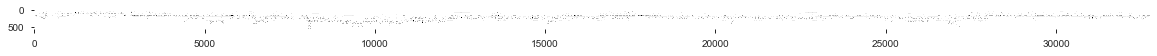

In [31]:
show_tree(dT,Tfeatures,'dec_t.png')

In [32]:
for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(TX_train, Ty_train.values.ravel())
    print("Model score for no of trees",i," is : ",model.score(TX_test, Ty_test.values.ravel()))

Model score for no of trees 1  is :  0.7528004905968929
Model score for no of trees 2  is :  0.7728331970564186
Model score for no of trees 3  is :  0.8134505314799673
Model score for no of trees 4  is :  0.8559280457890434
Model score for no of trees 5  is :  0.8786181520850368
Model score for no of trees 6  is :  0.8982420278004906
Model score for no of trees 7  is :  0.9128781684382665
Model score for no of trees 8  is :  0.9174366312346689
Model score for no of trees 9  is :  0.9084219133278822
Model score for no of trees 10  is :  0.9140433360588717
Model score for no of trees 11  is :  0.9208708094848732
Model score for no of trees 12  is :  0.9268397383483238
Model score for no of trees 13  is :  0.9215249386753884
Model score for no of trees 14  is :  0.9272485690923957
Model score for no of trees 15  is :  0.9279640228945216
Model score for no of trees 16  is :  0.9286385936222404
Model score for no of trees 17  is :  0.928045789043336
Model score for no of trees 18  is :  0.9

In [33]:
model.score(TX_test, Ty_test)

0.9316639411283728

In [34]:
Ty_predicted = model.predict(TX_test)

In [35]:
Tcm = confusion_matrix(Ty_test, Ty_predicted)
Tcm

array([[  76,    2,    0, ...,    0,    0,    0],
       [   0, 1024,    0, ...,    0,    0,    0],
       [   0,    0,  574, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  823,    0,    0],
       [   0,    0,    0, ...,    3,  368,    0],
       [   0,    0,    0, ...,    1,    7,   25]], dtype=int64)

Text(156.5, 0.5, 'Truth')

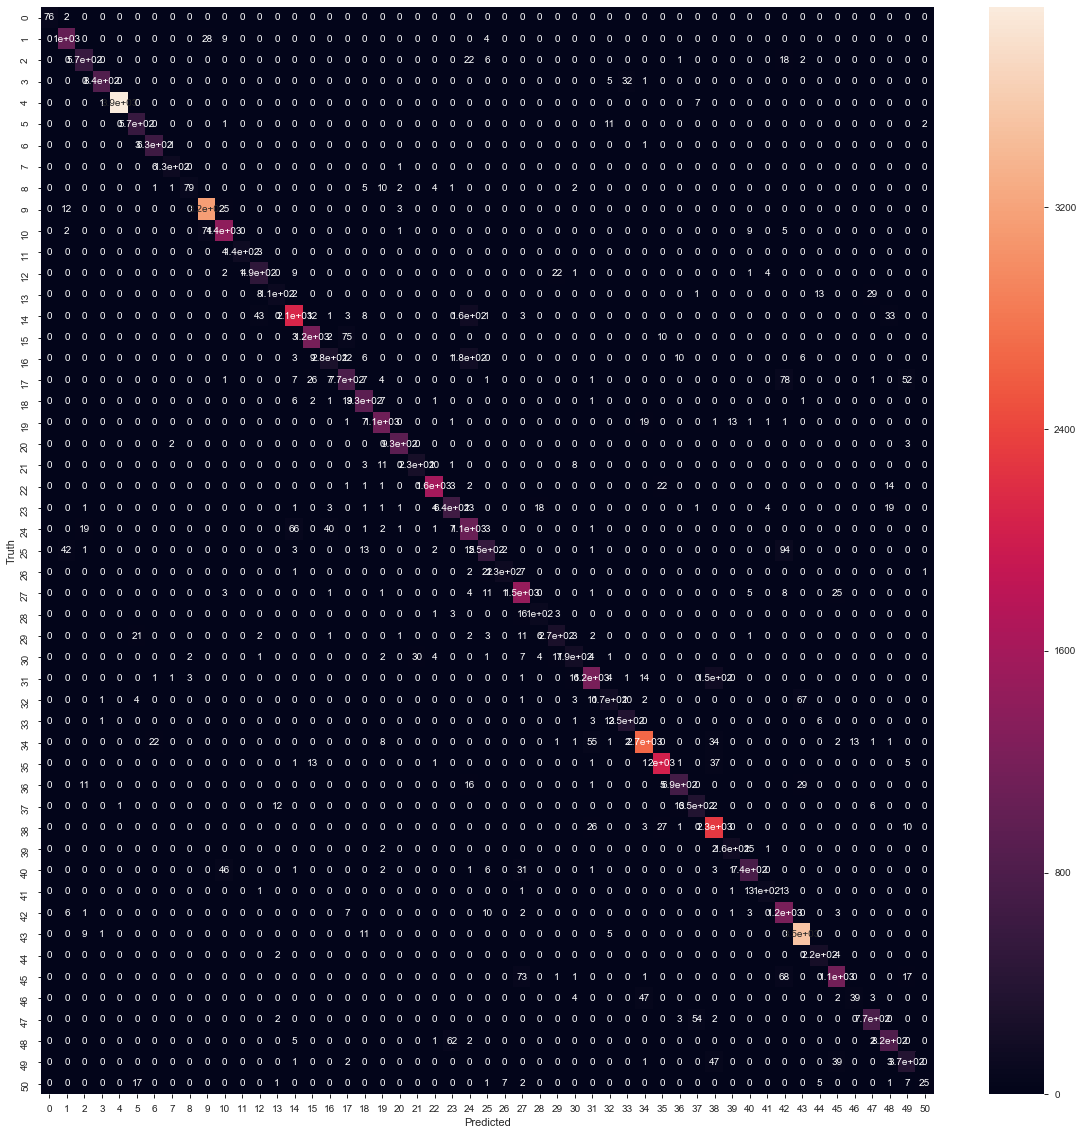

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(20,20))
sn.heatmap(Tcm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
Tfeatures2 = ["Total Discharges","Average Medicare Payments", "Average Covered Charges", "Provider State", "Hospital Referral Region (HRR) Description"]
Target2 = ["DRG Definition"]


TX_train2 = train[Tfeatures2]
Ty_train2 = train[Target2]

TX_test2 = test[Tfeatures2]
Ty_test2 = test[Target2]

dT2 = c.fit(TX_train2, Ty_train2)

In [31]:
Ty_pred2 = c.predict(TX_test2)

In [32]:
Tscore2 = accuracy_score(Ty_test2, Ty_pred2) * 100
Trounded_score2 = round(Tscore2, 1)
print("Decision Tree Classifier Accuracy: {}%".format(Trounded_score2))

Decision Tree Classifier Accuracy: 7.8%


# Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score, cross_val_predict

X = dz[Tfeatures]
y = dz[Target]

scores = cross_val_score(model, X, y.values.ravel(), cv=6)
"Cross-validated scores:", scores

('Cross-validated scores:',
 array([0.90697503, 0.94905841, 0.94436881, 0.94829426, 0.94636678,
        0.91418158]))

In [47]:
predictions = cross_val_predict(model, X, y.values.ravel(), cv=6)
Kcm = confusion_matrix(y, predictions)

Text(156.5, 0.5, 'Truth')

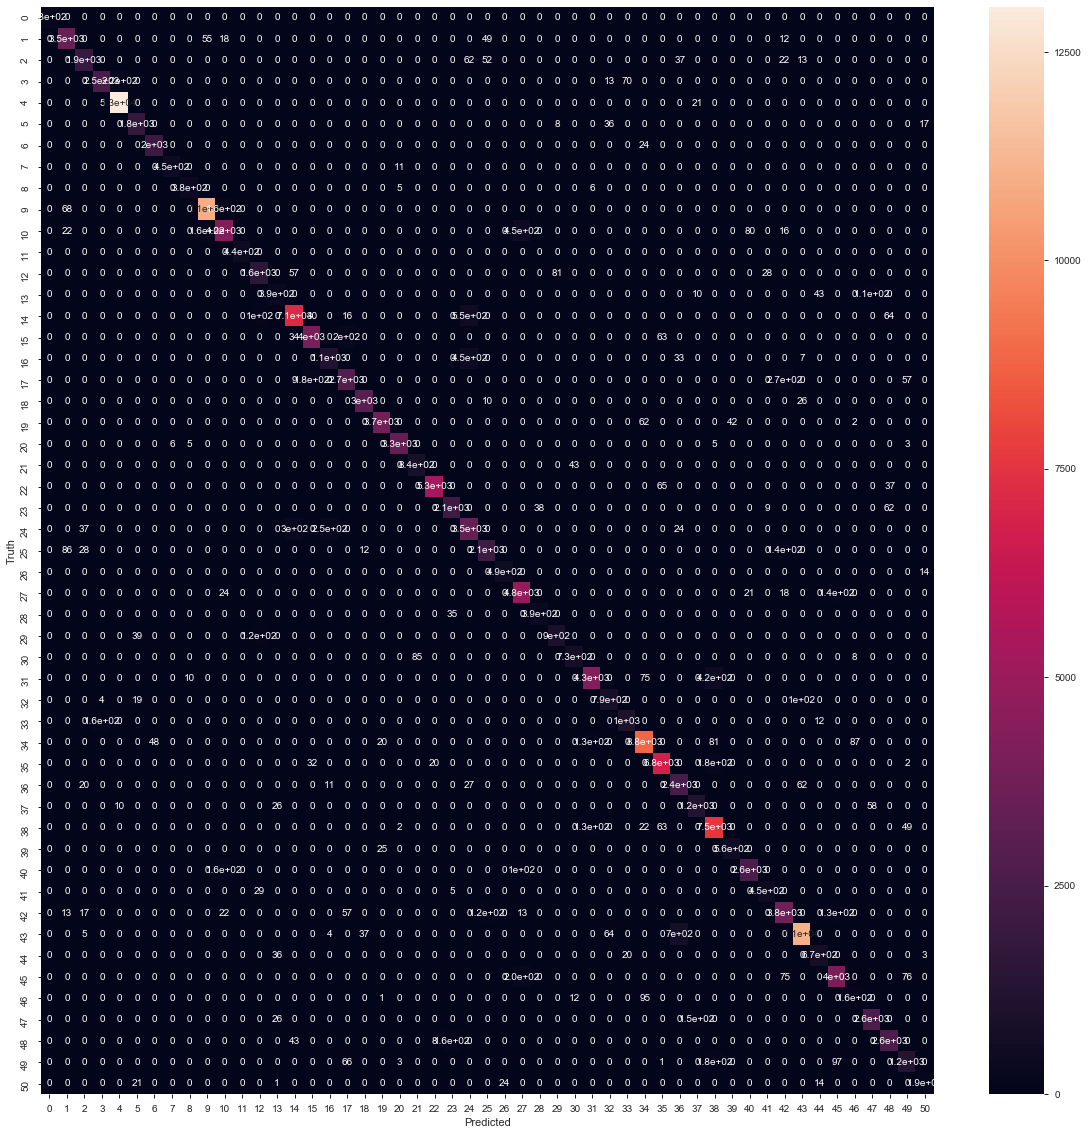

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(Kcm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
Kaccuracy = accuracy_score(y, predictions) * 100
r_Kaccuracy = round(Kaccuracy, 1)
print("Cross Predicted Accuracy: {}%".format(r_Kaccuracy))

Cross Predicted Accuracy: 93.5%


# K-Means Clustering

In [15]:
'''
KMeans Code Section 
  - Uses PCA to reduce the features
  - Then does K-Means
  - Two K-Means one without standardization and one with
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
target = df['Average Total Payments']
X = df.drop(columns='Average Total Payments')

X.describe()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,48.805568,255569.865428,1637.504382,1680.229865,964.389188,24.179560,47938.121908,151.779254,42.776304,36133.958434,8494.495174
std,28.934214,151563.671767,926.613671,961.281152,564.127054,14.499223,27854.323080,87.552090,51.104042,35065.365905,7309.467247
min,0.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1040.000000,0.000000,11.000000,2459.400000,1148.909091
25%,22.000000,110092.000000,838.000000,847.000000,454.000000,10.000000,27261.000000,71.000000,17.000000,15947.166670,4192.354839
50%,48.000000,250007.000000,1665.000000,1689.000000,970.000000,24.000000,44309.000000,158.000000,27.000000,25245.823530,6158.465116
75%,75.000000,380075.000000,2462.000000,2514.000000,1449.000000,37.000000,72901.000000,227.000000,49.000000,43232.592590,10056.882350
max,99.000000,670077.000000,3200.000000,3325.000000,1976.000000,50.000000,99835.000000,305.000000,3383.000000,929118.909100,154620.818200


In [13]:
# Not used

# result = pd.DataFrame(pca.fit_transform(X))
# print(f"Explained varience {pca.explained_variance_ratio_}")
# kmean = KMeans(n_clusters=2).fit(result)
# sns.set()

# res

# sns.relplot(data=result.sample(frac=.5))

In [17]:
test1, test2 = train_test_split(df,test_size=.5,random_state=1)
temp = pd.DataFrame(pca.fit(test1).transform(test1))
result = pd.DataFrame(temp)
# Add explained varience to the slides and what it means
print(f"Explained varience {pca.explained_variance_ratio_}")
kmean = KMeans(n_clusters=3,random_state=3).fit(result)

Explained varience [0.91650481 0.05260007]


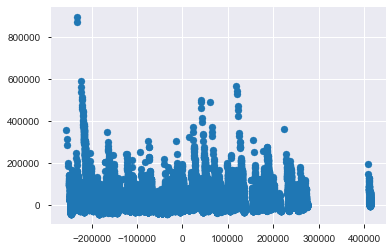

In [18]:
plt.scatter(x=temp[0],y=temp[1])

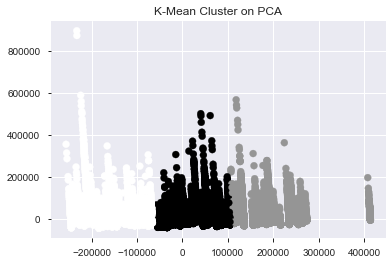

In [19]:
# Explain these in the slides
colors = kmean.fit_predict(test1)
plt.title("K-Mean Cluster on PCA")
plt.scatter(result[0],result[1],c=colors)

In [39]:
# Talk about this comparision in the slides between normal results and the standarization results
for col in df.columns:
    range_ = df[col].max() - df[col].min()
    print(f"Range for {col} is {range_}")

Range for DRG Definition is 99.0
Range for Provider Id is 660076
Range for Provider Name is 3200.0
Range for Provider Street Address is 3325.0
Range for Provider City is 1976.0
Range for Provider State is 50.0
Range for Provider Zip Code is 98795
Range for Hospital Referral Region (HRR) Description is 305.0
Range for Total Discharges is 3372
Range for Average Covered Charges is 926659.5091
Range for Average Total Payments is 153485.1818
Range for Average Medicare Payments is 153471.909109


In [47]:
stand = preprocessing.StandardScaler()
df2 = df.copy()
for col in df2.columns:
    arr = np.array(df2[col]).reshape(-1,1)
    df2[col] = stand.fit_transform(arr)
    range_ = df2[col].max() - df2[col].min()
    print(f"Range for {col} is {range_}")

Range for DRG Definition is 3.4215653345800305
Range for Provider Id is 4.35512030211676
Range for Provider Name is 3.453445499455457
Range for Provider Street Address is 3.4589362228102614
Range for Provider City is 3.5027677627952483
Range for Provider State is 3.448471190862593
Range for Provider Zip Code is 3.546857076738819
Range for Hospital Referral Region (HRR) Description is 3.483651094197586
Range for Total Discharges is 65.98324087973023
Range for Average Covered Charges is 26.426712699850988
Range for Average Total Payments is 20.02515438683522
Range for Average Medicare Payments is 20.996383799987104


Explained varience [0.25753317 0.21632702]


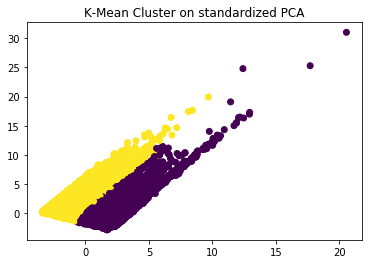

In [52]:
# Standarized PCA
test1, test2 = train_test_split(df2,test_size=.5,random_state=1)
temp = pd.DataFrame(pca.fit(test1).transform(test1))
result = pd.DataFrame(temp)
print(f"Explained varience {pca.explained_variance_ratio_}")
kmean = KMeans(n_clusters=2,random_state=1).fit(result)
colors = kmean.fit_predict(test1)
plt.title("K-Mean Cluster on standardized PCA")
plt.scatter(result[0],result[1],c=colors)

# Multiple Linear Regression Algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[-3.88873665e-01  7.43382290e-05  1.89229855e-02  6.76647342e-03
 -2.44363639e-02  1.21526740e+00  7.85246358e-04  3.67606555e-01
  8.25554585e-01  7.33833722e-03  1.01070958e+00]

Accuracy Percentage:  0.9807863985943546
Mean Absolute Error: 521.9732778837767
Mean Squared Error: 1135449.998421942
Root Mean Squared Error: 1065.5749614278395


NameError: name 'cross_val_score' is not defined

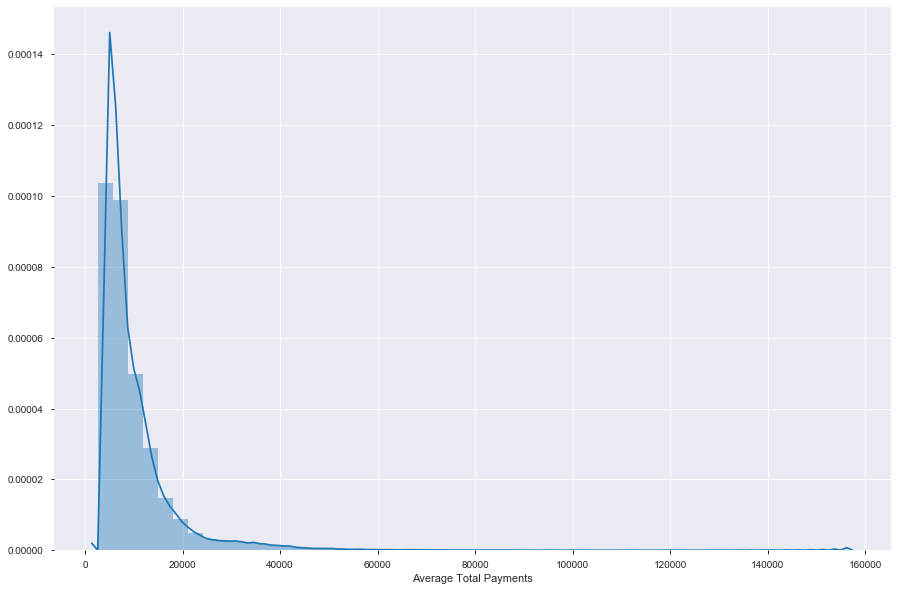

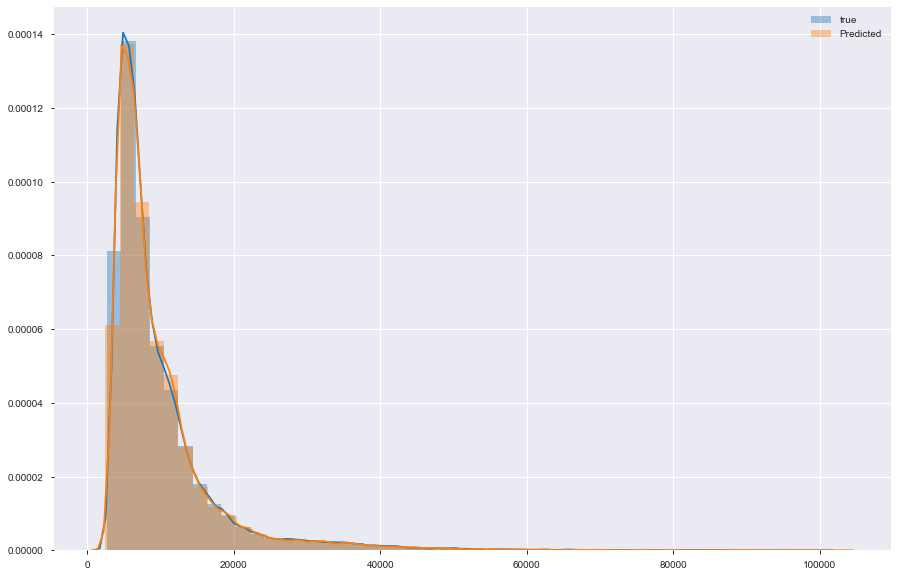

In [10]:
# Multiple Linear Regression Algorithm

y = df['Average Total Payments'].values
X = df.drop(columns='Average Total Payments').values
# X.describe()
plt.figure(0,figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Average Total Payments'])




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor)

coeff_df = regressor.coef_
print(coeff_df)


y_pred = regressor.predict(X_test)
df_ML = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# These graphs will be explained in the slides
plt.figure(1,figsize=(15,10))
sns.distplot(y_test,label='true')
sns.distplot(y_pred,label='Predicted')
plt.legend()
print("\nAccuracy Percentage: ",regressor.score(X_test,y_test))
df_ML.describe()


# Alternate Graph
# df1.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

# Explain these in the presentation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ml_scores = cross_val_score(df, X_train, y_train, cv = 12)
print("/nThis is the cross validation: ", ml_scores)